# CBRAIN-CAM diagnostics

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [532]:
%matplotlib inline
from cbrain.imports import *
from cbrain.utils import *
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import SVG, HTML, FileLink

In [3]:
FIG_DIR = './figures/'
TMP_DIR = '/beegfs/DATA/pritchard/srasp/tmp/'
DATA_DIR = '/beegfs/DATA/pritchard/srasp/'
#%ls -t {DATA_DIR}

In [368]:
# Set colors for line plots
colors = ['#7570b3', '#d95f02', '#1b9e77']
colors2 = ['#8da0cb', '#fc8d62', '#66c2a5']

In [5]:
def save_tmp(name, obj):
    with open(f'{TMP_DIR}{name}.pkl', 'wb') as f:
        pickle.dump(obj, f)
def load_tmp(name):
    with open(f'{TMP_DIR}{name}.pkl', 'rb') as f:
        obj = pickle.load(f)
    return obj

In [6]:
def savefigs(fig, name):
    fig.savefig(FIG_DIR + name + '.pdf')
    fig.savefig(FIG_DIR + name + '.png', dpi=300)

In [582]:
exps_ak = ['sp8fbp_andkua', 'nnatmonly_fbp8_D025_andkua_nofix_betafix35', 
           'nnatmonly_fbp8_D024_andkua_nofix_betafix35',
           'nnatmonly_fbp8_D032_andkua_nofix_betafix35', 'nonsp_andkua']
exps_ak_D024 = ['sp8fbp_andkua', 'nnatmonly_fbp8_D024_andkua_nofix_betafix35', 'nonsp_andkua']
exps_ak_D025 = ['sp8fbp_andkua', 'nnatmonly_fbp8_D025_andkua_nofix_betafix35', 'nonsp_andkua']
#exps_ak_nf = ['nnatmonly_fbp8_D024_andkua_nofix_betafix35', 'nnatmonly_fbp8_D025_andkua_nofix_betafix35']
# exps_length = ['nnatmonly_fbp8_D018_andkua_nofix_betafix35', 'nnatmonly_fbp8_D019_andkua_nofix_betafix35', 
#                'nnatmonly_fbp8_D020_andkua_nofix_betafix35', 'nnatmonly_fbp8_D021_andkua_nofix_betafix35']
# exps_betafix = ['nnatmonly_fbp8_D004_andkua_nofix', 'nnatmonly_fbp8_D004_andkua_nofix_betafix25', 
#                 'nnatmonly_fbp8_D004_andkua_nofix_betafix35',  'nnatmonly_fbp8_D004_andkua_nofix_betafix5']
exps_1k = ['sp8fbp_1k', 'nnatmonly_fbp8_D025_1k_nofix_betafix35', 
           'nnatmonly_fbp8_D024_1k_nofix_betafix35', 'nnatmonly_fbp8_D032_1k_nofix_betafix35', 'nonsp_1k']
exps_2k = ['sp8fbp_2k', 'nnatmonly_fbp8_D025_2k_nofix_betafix35', 
           'nnatmonly_fbp8_D024_2k_nofix_betafix35',
           'nnatmonly_fbp8_D032_2k_nofix_betafix35', 'nonsp_2k']
exps_3k = ['sp8fbp_3k', 'nnatmonly_fbp8_D025_3k_nofix_betafix35', 
           'nnatmonly_fbp8_D024_3k_nofix_betafix35',
           'nnatmonly_fbp8_D032_3k_nofix_betafix35', 'nonsp_3k']
exps_4k = ['sp8fbp_4k', 'nnatmonly_fbp8_D025_4k_nofix_betafix35', 
           'nnatmonly_fbp8_D024_4k_nofix_betafix35',
           'nnatmonly_fbp8_D032_4k_nofix_betafix35', 'nonsp_4k']
exps_1k_D024 = ['sp8fbp_1k', 'nnatmonly_fbp8_D024_1k_nofix_betafix35', 'nonsp_1k']
exps_2k_D024 = ['sp8fbp_2k', 'nnatmonly_fbp8_D024_2k_nofix_betafix35', 'nonsp_2k']
exps_3k_D024 = ['sp8fbp_3k', 'nnatmonly_fbp8_D024_3k_nofix_betafix35', 'nonsp_3k']
exps_4k_D024 = ['sp8fbp_4k', 'nnatmonly_fbp8_D024_4k_nofix_betafix35', 'nonsp_4k']
exps_1k_D025 = ['sp8fbp_1k', 'nnatmonly_fbp8_D025_1k_nofix_betafix35', 'nonsp_1k']
exps_2k_D025 = ['sp8fbp_2k', 'nnatmonly_fbp8_D025_2k_nofix_betafix35', 'nonsp_2k']
exps_3k_D025 = ['sp8fbp_3k', 'nnatmonly_fbp8_D025_3k_nofix_betafix35', 'nonsp_3k']
exps_4k_D025 = ['sp8fbp_4k', 'nnatmonly_fbp8_D025_4k_nofix_betafix35', 'nonsp_4k']
exps_3kw1 = ['sp8fbp_3kw1', 'nnatmonly_fbp8_D025_3kw1_nofix_betafix35', 
           'nnatmonly_fbp8_D024_3kw1_nofix_betafix35',  
           'nnatmonly_fbp8_D032_3kw1_nofix_betafix35', 'nonsp_3kw1']
exps_3kw1_D024 = ['sp8fbp_3kw1', 'nnatmonly_fbp8_D024_3kw1_nofix_betafix35', 'nonsp_3kw1']
exps_3kw1_D025 = ['sp8fbp_3kw1', 'nnatmonly_fbp8_D025_3kw1_nofix_betafix35', 'nonsp_3kw1']
# exps_3kw1 = ['sp8fbp_3kw1', 'nnatmonly_fbp8_D004_3kw1_nofix', 'nonsp_3kw1']
exps = exps_ak + exps_1k + exps_2k + exps_3k + exps_4k + exps_3kw1

exps_sp = ['sp8fbp_andkua', 'sp8fbp_1k', 'sp8fbp_2k', 'sp8fbp_3k', 'sp8fbp_4k']
exps_D024 = ['nnatmonly_fbp8_D024_andkua_nofix_betafix35', 'nnatmonly_fbp8_D024_1k_nofix_betafix35', 
           'nnatmonly_fbp8_D024_2k_nofix_betafix35', 'nnatmonly_fbp8_D024_3k_nofix_betafix35', 
           'nnatmonly_fbp8_D024_4k_nofix_betafix35']
exps_D025 = ['nnatmonly_fbp8_D025_andkua_nofix_betafix35', 'nnatmonly_fbp8_D025_1k_nofix_betafix35', 
           'nnatmonly_fbp8_D025_2k_nofix_betafix35', 'nnatmonly_fbp8_D025_3k_nofix_betafix35', 
           'nnatmonly_fbp8_D025_4k_nofix_betafix35']
exps_D031 = ['nnatmonly_fbp8_D031_andkua_nofix_betafix35', 'nnatmonly_fbp8_D031_1k_nofix_betafix35', 
           'nnatmonly_fbp8_D031_2k_nofix_betafix35', 'nnatmonly_fbp8_D031_3k_nofix_betafix35', 
           'nnatmonly_fbp8_D031_4k_nofix_betafix35']
exps_D032 = ['nnatmonly_fbp8_D032_andkua_nofix_betafix35', 'nnatmonly_fbp8_D032_1k_nofix_betafix35', 
           'nnatmonly_fbp8_D032_2k_nofix_betafix35', 'nnatmonly_fbp8_D032_3k_nofix_betafix35', 
           'nnatmonly_fbp8_D032_4k_nofix_betafix35']
exps_nonsp = ['nonsp_andkua', 'nonsp_1k', 'nonsp_2k', 'nonsp_3k', 'nonsp_4k']

In [413]:
variables = ['TAP', 'QAP', 'UAP', 'VAP', 'TPHYSTND', 'PHQ', 'PRECT', 'FSNS', 'FSNT', 'FLNS', 'FLNT', 'TS', 'TW', 'TE',
            'PS', 'P0', 'hyai', 'hybi', 'NNDQ', 'NNDT', 'gw', 'LHFLX', 'SHFLX', 'NNLHF', 'NNSHF', 
            'NNFSNT', 'NNFSNS', 'NNFLNT', 'NNFLNS']

In [573]:
year = '[1-5]'
#year = '1'

In [396]:
%%time
h0s = {e : xr.open_mfdataset(f'{DATA_DIR}{e}/*.h0.000{year}-*', decode_times=False) for e in list(set(exps))}

CPU times: user 7min 18s, sys: 536 ms, total: 7min 18s
Wall time: 8min 44s


In [701]:
for e in ['nnatmonly_fbp8_D025_andkua_nofix_betafix35_long']:
    h0s[e] = xr.open_mfdataset(f'{DATA_DIR}{e}/*.h0.0*', decode_times=False)

In [554]:
for e, d in h0s.items():
    if not 'PRECT' in d.data_vars:
        d['PRECT'] = d['PRECC'] + d['PRECL']

In [702]:
save_tmp('saved_h0s', h0s)
#h0s = load_tmp('saved_h0s')

In [703]:
for ds in h0s.values():
    tmp = list(ds.data_vars)
    for v in tmp:
        if v not in variables:
            del ds[v]

In [400]:
%%time
h0means = {e: h.mean('time').compute() for e, h in h0s.items()}

CPU times: user 4min 34s, sys: 1min 3s, total: 5min 37s
Wall time: 16min 22s


In [704]:
for e in ['nnatmonly_fbp8_D025_andkua_nofix_betafix35_long']:
    h0means[e] = h0s[e].mean('time').compute()

KeyboardInterrupt: 

In [401]:
for e, d in h0means.items():
    d['PRECT'] *= 1e3*24*3600

In [855]:
save_tmp('saved_h0means', h0means)
#h0means = load_tmp('saved_h0means')

In [415]:
%%time
h1s = {e : xr.open_mfdataset(f'{DATA_DIR}{e}/*.h1.0001-01*', decode_times=False, decode_cf=False) 
       for e in exps_ak}

KeyboardInterrupt: 

In [416]:
#save_tmp('saved_h1s', h1s)
h1s = load_tmp('saved_h1s')

In [227]:
for ds in h1s.values():
    tmp = list(ds.data_vars)
    for v in tmp:
        if v not in variables:
            del ds[v]

In [228]:
%%time
h1stds = {e: h.isel(time=slice(0, None, 8)).std('time').compute() for e, h in h1s.items()}

CPU times: user 2min 1s, sys: 53.9 s, total: 2min 55s
Wall time: 10min 30s


In [856]:
save_tmp('h1stds', h1stds)
# h1s = load_tmp('saved_h1s')

In [43]:
def compare(func, exps, ref=None, title=None, hs=h0means, **kwargs):
    npanels = len(exps) if ref is None else len(exps) + 1
    ncols=min(3, npanels); nrows=int(np.ceil(npanels/ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(13.5, 4*nrows));
    if ref is None:
        [func(hs[e]).plot(ax=ax, **kwargs) for e, ax in zip(exps, axs.flat)]
        [ax.set_title(e) for e, ax in zip(exps, axs.flat)]
    else:
        yi = kwargs['yincrease'] if 'yincrease' in kwargs.keys() else None
        func(hs[ref]).plot(ax=axs.flat[0], yincrease=yi); axs.flat[0].set_title(ref)
        [(func(hs[e])-func(hs[ref]).values).plot(ax=ax, **kwargs) for e, ax in zip(exps, axs.flat[1:])]
        [ax.set_title(f'{e} - {ref}'[-50:]) for e, ax in zip(exps, axs.flat[1:])]
    if title is None: plt.tight_layout()
    else: fig.suptitle(title); plt.tight_layout(rect=(0, 0, 1, 0.95))
    return fig, axs

In [44]:
def compare_line(func, exps, hs, ax=None, legend=True, **kwargs):
    if ax is None: fig, ax = plt.subplots(figsize=(6, 5))
    [func(hs[e]).plot(ax=ax, label=e, **kwargs) for e in exps]
    if legend: ax.legend()

In [45]:
def climate_error(meanf, errf, ref, exps):
    means = [meanf(h0s[e]) for e in [ref] + exps]
    err = [errf(means[0], means[i]) for i in range(1, len(means))]
    stats = [vint(means[0], da, 1) for da in err]
    stats = [gw_avg(means[0], '', da).compute() for da in stats]
    return stats

In [71]:
inchincm = 2.45
twocols = 17.8/inchincm # Inches
onecol = twocols*0.95*0.5
onecol, twocols

(3.451020408163265, 7.26530612244898)

In [560]:
FONTSIZE = 6
plt.rc('font', size=FONTSIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONTSIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONTSIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONTSIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONTSIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONTSIZE)    # legend fontsize
plt.rc('figure', titlesize=FONTSIZE)  # fontsize of the figure title

## Mean climate and parameterized tendencies

In [81]:
# Gaussian latitudes
lats = h0s[exps_ak[0]].lat.values
gw = h0s[exps_ak[0]].gw.isel(time=1)
gwsum = np.cumsum(gw.values)

In [82]:
label_lats = [-60, -30, 0, 30, 60]
gw_lats = [np.interp(l, lats, gwsum) for l in label_lats]

In [131]:
def mean_panels(hdict, func, exps, exp_ref=None, vmin=-5, vmax=5, cm_ref='plasma', cm='RdBu_r', unit='Temperature [K]', 
                contourf=False, levels_ref=None, levels=None, clevels=None, clabel_locs=[], clabel_fmt='%.0f', 
                clev_color='white', width=onecol, height=1.5, titles=None, cbar_ticks=None):
    has_ref = int(exp_ref is not None)
    npanels = len(exps) + has_ref
    fig, axs = plt.subplots(1, npanels, figsize=(width, height))
    
    if has_ref:
        da_ref = func(hdict[exp_ref]); da_ref['lat'] = gwsum
        if contourf:
            da_ref.plot.contourf(ax=axs[0], yincrease=False, add_colorbar=False, cmap=cm_ref, levels=levels_ref)
            if clevels is not None:
                cs = da_ref.plot.contour(ax=axs[0], yincrease=False, add_colorbar=False, levels=clevels, 
                                         colors=clev_color, linewidths=1)
                plt.clabel(cs, fmt=clabel_fmt, manual=clabel_locs)
        else:
            da_ref.plot(ax=axs[0], yincrease=False, add_colorbar=False, cmap=cm_ref)
    
    for ax, exp in zip(axs.flat[has_ref:], exps):
        da = func(hdict[exp]); da['lat'] = gwsum
        if has_ref: da -= da_ref
        if contourf:
            im = da.plot.contourf(ax=ax, yincrease=False, add_colorbar=False, cmap=cm, levels=levels)
        else:
            im = da.plot(ax=ax, yincrease=False, add_colorbar=False, vmin=vmin, vmax=vmax, cmap=cm)
            
    [ax.set_xticks(gw_lats) for ax in axs.flat]; [ax.set_xticklabels(label_lats) for ax in axs.flat]; 
    [ax.set_yticks([]) for ax in axs.flat[1:]]; [ax.set_ylabel('') for ax in axs.flat[1:]];
    axs[0].set_ylabel('Pressure [hPa]'); [ax.set_xlabel('Latitude') for ax in axs.flat]
    if titles is not None: [ax.set_title(titles[i], pad=3) for i, ax in enumerate(axs.flat)]
    
    plt.subplots_adjust(wspace=0.03, left=0.13, right=1.0, bottom=0.22, top=0.9)
    cb = fig.colorbar(im, ax=axs.flat, pad=0.01, extend='both', use_gridspec=False); cb.set_label(unit)
    if cbar_ticks is not None: cb.set_ticks(cbar_ticks)
    cb.formatter.set_powerlimits((-2, 2)); cb.update_ticks()
    cb.ax.yaxis.set_offset_position('left')
    
    return fig

### Nofix runs

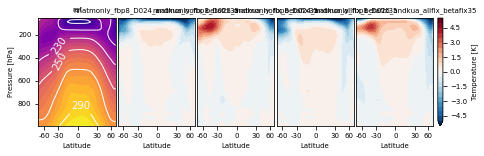

In [371]:
f = mean_panels(h0means, lambda d: d['TAP'].isel(lev=slice(5, None)).mean('lon'), 
                exps_ak_nf + [exps_ak_D024[1]] + [exps_ak_D025[1]], exps_ak[0], 
                    contourf=True, width=pagewidth, 
               titles=['ref'] + exps_ak_nf + [exps_ak_D024[1]] + [exps_ak_D025[1]],
                    clevels=np.arange(190, 310, 20), levels_ref=np.arange(180, 305, 5), 
                    levels=np.arange(-5, 6, 0.5), clabel_locs=clabel_locs)

### Warming

In [557]:
sst_titles = ['+0K', '+1K', '+2K', '+3K', '+4K']

In [558]:
clabel_locs = [(1, 180), (1, 200), (1, 400), (1, 600), (1, 900)]

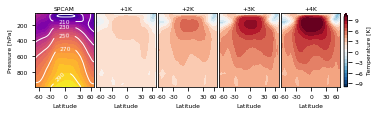

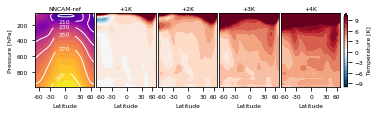

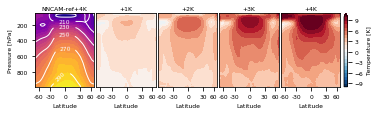

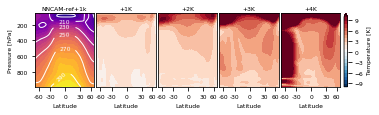

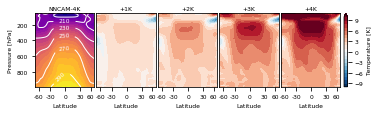

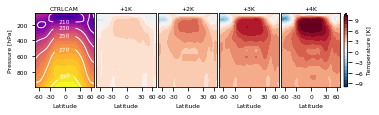

In [561]:
for name, exps in zip(['SPCAM', 'NNCAM-ref', 'NNCAM-ref+4K', 'NNCAM-ref+1k', 'NNCAM-4K', 'CTRLCAM'], 
                      [exps_sp, exps_D025, exps_D024, exps_D031, exps_D032, exps_nonsp]):
    f = mean_panels(h0means, lambda d: d['TAP'].isel(lev=slice(5, None)).mean('lon'), exps[1:], exps[0], 
                    contourf=True, width=twocols*0.8, titles=[name] + sst_titles[1:], 
                    clevels=np.arange(190, 310, 20), levels_ref=np.arange(180, 305, 5), 
                    levels=np.arange(-10, 11, 1), clabel_locs=clabel_locs)
    f.savefig(f'{FIG_DIR}warming_T_{name}.pdf')
    plt.show()

In [562]:
clabel_locs = [(0.2, 900), (0.7, 900)]

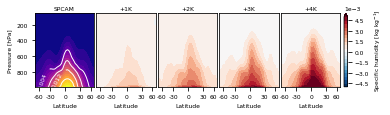

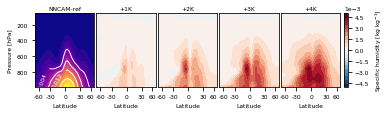

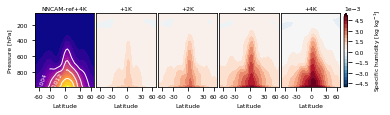

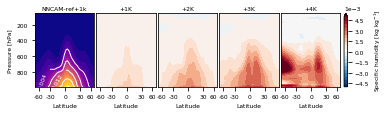

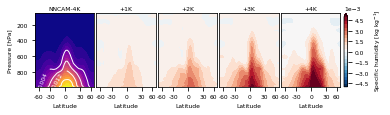

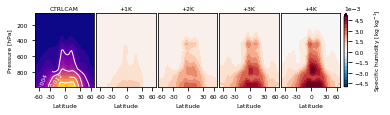

In [564]:
for name, exps in zip(['SPCAM', 'NNCAM-ref', 'NNCAM-ref+4K', 'NNCAM-ref+1k', 'NNCAM-4K', 'CTRLCAM'], 
                      [exps_sp, exps_D025, exps_D024, exps_D031, exps_D032, exps_nonsp]):
    f = mean_panels(h0means, lambda d: d['QAP'].isel(lev=slice(5, None)).mean('lon'), exps[1:], exps[0], 
                    contourf=True, width=twocols*0.8, titles=[name] + sst_titles[1:], 
                    clevels=np.arange(0, 0.024, 0.004), levels_ref=np.arange(0, 0.021, 0.001), clabel_fmt='%.3f',
                    levels=np.arange(-0.005, 0.0055, 0.0005), clabel_locs=clabel_locs, unit=r'Specific humidity [kg kg$^{-1}$]')
    f.savefig(f'{FIG_DIR}warming_Q_{name}.pdf')
    plt.show()

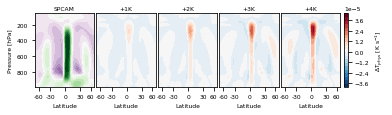

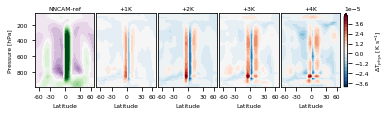

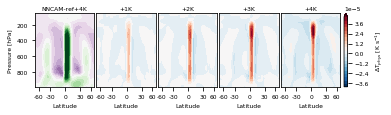

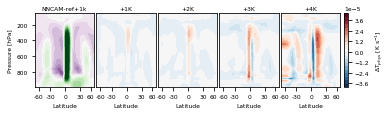

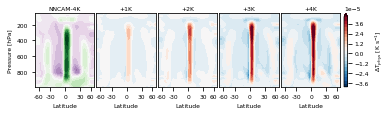

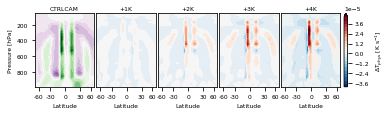

In [565]:
for name, exps in zip(['SPCAM', 'NNCAM-ref', 'NNCAM-ref+4K', 'NNCAM-ref+1k', 'NNCAM-4K', 'CTRLCAM'], 
                      [exps_sp, exps_D025, exps_D024, exps_D031, exps_D032, exps_nonsp]):
    f = mean_panels(h0means, lambda d: d['TPHYSTND'].isel(lev=slice(5, None)).mean('lon'), exps[1:], exps[0], 
                    contourf=True, width=twocols*0.8, titles=[name] + sst_titles[1:], 
                    levels_ref=np.arange(-5e-5, 5.5e-5, 5e-6), unit='$\Delta$T$_{phys}$ [K s$^{-1}$]',
                    levels=np.arange(-4e-5, 4.4e-5, 4e-6), cm_ref='PRGn')
    f.savefig(f'{FIG_DIR}warming_TPHY_{name}.pdf')
    plt.show()

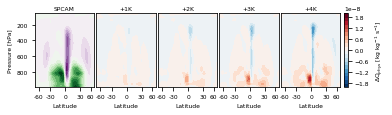

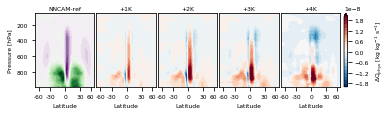

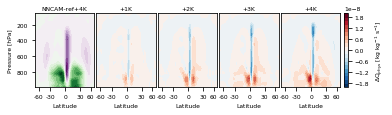

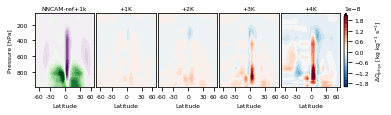

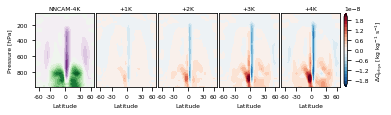

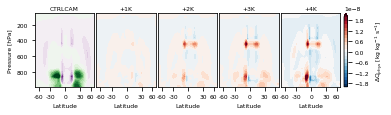

In [568]:
for name, exps in zip(['SPCAM', 'NNCAM-ref', 'NNCAM-ref+4K', 'NNCAM-ref+1k', 'NNCAM-4K', 'CTRLCAM'], 
                      [exps_sp, exps_D025, exps_D024, exps_D031, exps_D032, exps_nonsp]):
    f = mean_panels(h0means, lambda d: d['PHQ'].isel(lev=slice(5, None)).mean('lon'), exps[1:], exps[0], 
                    contourf=True, width=twocols*0.8, titles=[name] + sst_titles[1:], 
                    levels_ref=np.arange(-3e-8, 3.3e-8, 3e-9), unit='$\Delta$Q$_{phys}$ [kg kg$^{-1}$ s$^{-1}$]',
                    levels=np.arange(-2e-8, 2.2e-8, 2e-9), cm_ref='PRGn')
    f.savefig(f'{FIG_DIR}warming_PHQ_{name}.pdf')
    plt.show()

### Training length

ValueError: dimensions or multi-index levels ['time'] do not exist

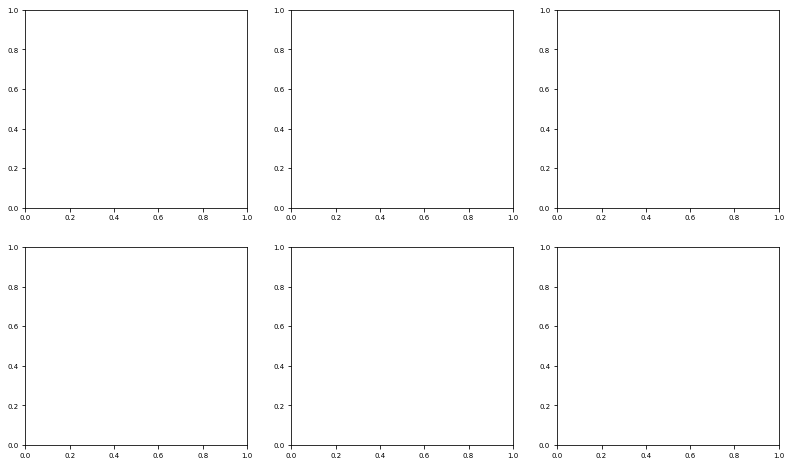

In [430]:
compare(lambda d: d['TAP'].sel(time=slice(30, None)).mean(('time', 'lon')), 
        exps_length + ['nnatmonly_fbp8_D004_andkua_nofix_betafix35'], ref=exps_ak[0], 
        yincrease=False, vmin=-5, vmax=5, cmap='RdBu_r', title='Mean Temperature');

In [ ]:
compare(lambda d: d['QAP'].sel(time=slice(30, None)).mean(('time', 'lon')), 
        exps_length + ['nnatmonly_fbp8_D004_andkua_nofix_betafix35'], ref=exps_ak[0], 
        yincrease=False, vmin=-0.002, vmax=0.002, cmap='RdBu_r', title='Mean Humidity');

In [ ]:
climerr = climate_error(
    lambda d: d.sel(time=slice(30, None)).isel(lev=slice(5, None), ilev=slice(5, None)).mean(('time')),
    lambda ref, d: np.fabs(ref['TAP'] - d['TAP']), exps_ak[0], 
    exps_length + ['nnatmonly_fbp8_D004_andkua_nofix_betafix35'])

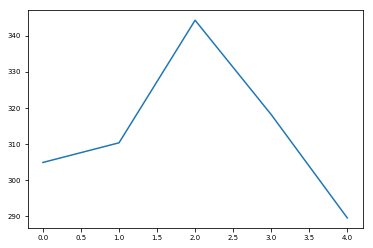

In [75]:
plt.plot(climerr)

In [76]:
climerr = climate_error(
    lambda d: d.sel(time=slice(30, None)).isel(lev=slice(5, None), ilev=slice(5, None)).mean(('time')),
    lambda ref, d: np.fabs(ref['QAP'] - d['QAP']), exps_ak[0], 
    exps_length + ['nnatmonly_fbp8_D004_andkua_nofix_betafix35'])

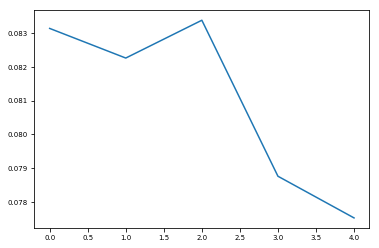

In [77]:
plt.plot(climerr)

### Temperature

In [583]:
clabel_locs = [(1, 150), (1, 200), (1, 300), (1, 500), (1, 900)]

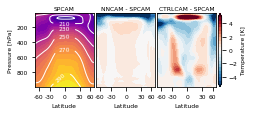

In [179]:
f = mean_panels(h0means, lambda d: d['TAP'].isel(lev=slice(3, None)).mean('lon'), exps_ak_D024[1:], exps_ak_D024[0], 
                contourf=True, width=onecol, titles=['SPCAM', 'NNCAM - SPCAM', 'CTRLCAM - SPCAM'], 
                clevels=np.arange(190, 310, 20), levels_ref=np.arange(180, 305, 5),
                levels=np.arange(-5, 5.5, 0.5), clabel_locs=clabel_locs, cbar_ticks=[-4, -2, 0, 2, 4])

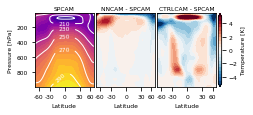

In [584]:
f = mean_panels(h0means, lambda d: d['TAP'].isel(lev=slice(3, None)).mean('lon'), exps_ak_D025[1:], exps_ak_D025[0], 
                contourf=True, width=onecol, titles=['SPCAM', 'NNCAM - SPCAM', 'CTRLCAM - SPCAM'], 
                clevels=np.arange(190, 310, 20), levels_ref=np.arange(180, 305, 5),
                levels=np.arange(-5, 5.5, 0.5), clabel_locs=clabel_locs, cbar_ticks=[-4, -2, 0, 2, 4])

In [218]:
savefigs(f, 'mean_temperature')

In [586]:
exps_ak_D025, exps_ak

(['sp8fbp_andkua',
  'nnatmonly_fbp8_D025_andkua_nofix_betafix35',
  'nonsp_andkua'],
 ['sp8fbp_andkua',
  'nnatmonly_fbp8_D025_andkua_nofix_betafix35',
  'nnatmonly_fbp8_D024_andkua_nofix_betafix35',
  'nnatmonly_fbp8_D032_andkua_nofix_betafix35',
  'nonsp_andkua'])

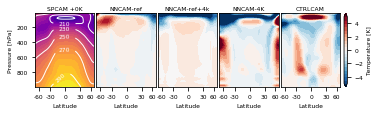

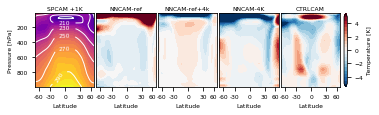

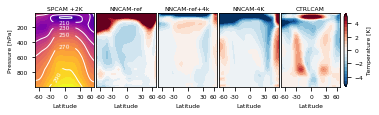

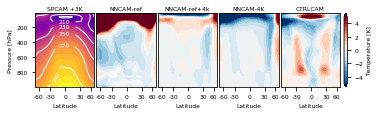

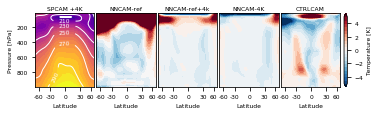

In [595]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak, exps_1k, exps_2k, exps_3k, exps_4k]):
    f = mean_panels(h0means, lambda d: d['TAP'].isel(lev=slice(3, None)).mean('lon'), exps[1:], exps[0], 
                    contourf=True, width=twocols*0.8, 
                    titles=['SPCAM ' + name, 'NNCAM-ref', 'NNCAM-ref+4k', 'NNCAM-4K', 'CTRLCAM'], 
                    clevels=np.arange(190, 310, 20), levels_ref=np.arange(180, 305, 5),
                    levels=np.arange(-5, 5.5, 0.5), clabel_locs=clabel_locs, cbar_ticks=[-4, -2, 0, 2, 4])
    savefigs(f, f'comp_T_{name}')
    plt.show()

### Humidity

In [185]:
clabel_locs = [(0.2, 900), (0.7, 900)]

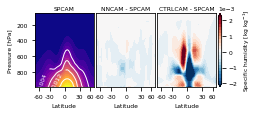

In [186]:
f = mean_panels(h0means, lambda d: d['QAP'].isel(lev=slice(5, None)).mean('lon'), exps_ak_D025[1:], exps_ak_D025[0], 
                contourf=True, titles=['SPCAM', 'NNCAM - SPCAM', 'CTRLCAM - SPCAM'], 
                clevels=np.arange(0, 0.024, 0.004), levels_ref=np.arange(0, 0.021, 0.001), clabel_fmt='%.3f',
                levels=np.arange(-0.002, 0.0022, 0.0002), clabel_locs=clabel_locs, 
                unit=r'Specific humidity [kg kg$^{-1}$]', cbar_ticks=np.arange(-2e-3, 3e-3, 1e-3))

In [187]:
savefigs(f, 'mean_humidity')

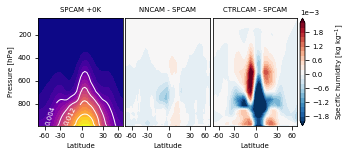

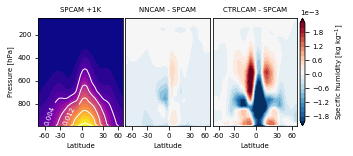

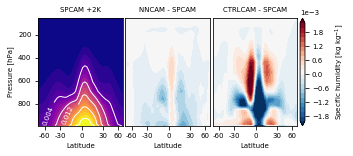

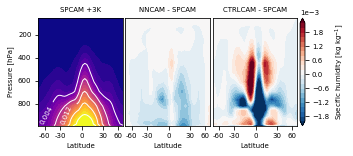

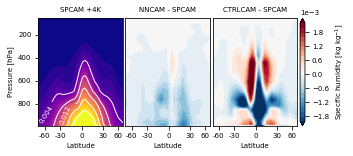

In [63]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak_D024, exps_1k_D024, exps_2k_D024, exps_3k_D024, exps_4k_D024]):
    f = mean_panels(h0means, lambda d: d['QAP'].isel(lev=slice(5, None)).mean('lon'), exps[1:], exps[0], 
                    contourf=True, width=twocols, titles=['SPCAM ' + name, 'NNCAM - SPCAM', 'CTRLCAM - SPCAM'], 
                    clevels=np.arange(0, 0.024, 0.004), levels_ref=np.arange(0, 0.021, 0.001), clabel_fmt='%.3f',
                    levels=np.arange(-0.002, 0.0022, 0.0002), clabel_locs=clabel_locs, unit=r'Specific humidity [kg kg$^{-1}$]')
    f.savefig(f'{FIG_DIR}comp_Q_{name}.pdf')
    plt.show()

### Wind

In [188]:
clabel_locs = [(1, 700), (0.75, 450), (0.6, 300)]

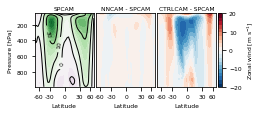

In [189]:
f = mean_panels(h0means, lambda d: d['UAP'].isel(lev=slice(5, None)).mean('lon'), exps_ak_D025[1:], exps_ak_D025[0], 
                contourf=True, titles=['SPCAM', 'NNCAM - SPCAM', 'CTRLCAM - SPCAM'], 
                clevels=[-10, 0, 10, 30], levels_ref=np.arange(-80, 85, 5), cm_ref='PRGn', clev_color='k',
                levels=np.arange(-20, 22, 2), clabel_locs=clabel_locs, unit=r'Zonal wind [m s$^{-1}$]',
                cbar_ticks=np.arange(-20, 30, 10))

In [190]:
savefigs(f, 'mean_wind')

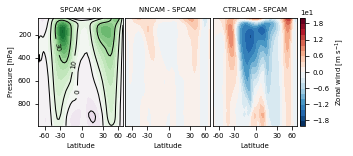

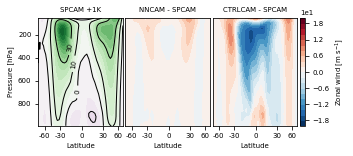

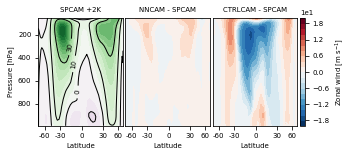

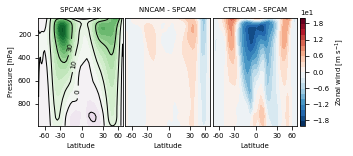

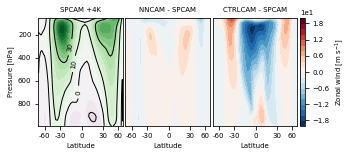

In [65]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak_D024, exps_1k_D024, exps_2k_D024, exps_3k_D024, exps_4k_D024]):
    f = mean_panels(h0means, lambda d: d['UAP'].isel(lev=slice(5, None)).mean('lon'), exps[1:], exps[0], 
                    contourf=True, width=twocols, titles=['SPCAM ' + name, 'NNCAM - SPCAM', 'CTRLCAM - SPCAM'], 
                    clevels=[-10, 0, 10, 30], levels_ref=np.arange(-80, 85, 5), cm_ref='PRGn', clev_color='k',
                    levels=np.arange(-20, 22, 2), clabel_locs=clabel_locs, unit=r'Zonal wind [m s$^{-1}$]')
    f.savefig(f'{FIG_DIR}comp_U_{name}.pdf')
    plt.show()

### Heating

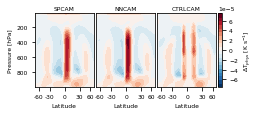

In [183]:
f = mean_panels(h0means, lambda d: d['TPHYSTND'].isel(lev=slice(3, None)).mean('lon'), exps_ak_D025, 
                contourf=True, titles=['SPCAM', 'NNCAM', 'CTRLCAM'],
                levels=np.arange(-7.5e-5, 8.25e-5, 7.5e-6), unit='$\Delta$T$_{phys}$ [K s$^{-1}$]',
                cbar_ticks=np.arange(-6e-5, 8e-5, 2e-5))

In [184]:
savefigs(f, 'mean_heating')

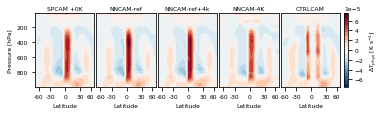

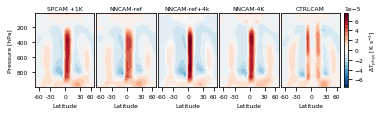

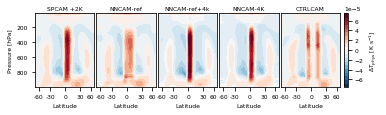

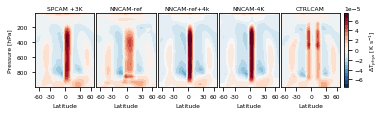

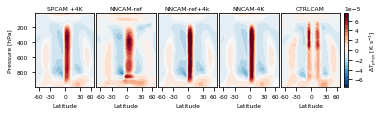

In [603]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak, exps_1k, exps_2k, exps_3k, exps_4k]):
    f = mean_panels(h0means, lambda d: d['TPHYSTND'].isel(lev=slice(3, None)).mean('lon'), exps, 
                    contourf=True, width=twocols*0.8, 
                    titles=['SPCAM ' + name, 'NNCAM-ref', 'NNCAM-ref+4k', 'NNCAM-4K', 'CTRLCAM'],
                    levels=np.arange(-7.5e-5, 8.25e-5, 7.5e-6), unit='$\Delta$T$_{phys}$ [K s$^{-1}$]',
                    cbar_ticks=np.arange(-6e-5, 8e-5, 2e-5))
    savefigs(f, f'comp_TPHY_{name}')
    plt.show()

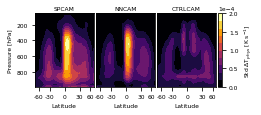

In [250]:
f = mean_panels(h1stds, lambda d: d['TPHYSTND'].isel(lev=slice(5, None)).mean('lon'), exps_ak_D025, 
                contourf=True, titles=['SPCAM', 'NNCAM', 'CTRLCAM'],
                levels=np.arange(0, 2.2e-4, 2e-5), cm='inferno', unit='Std $\Delta$T$_{phys}$ [K s$^{-1}$]',
                cbar_ticks=np.arange(0, 3e-4, 0.5e-4))

In [251]:
savefigs(f, 'std_heating')

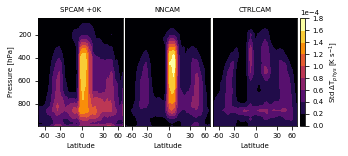

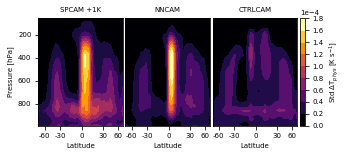

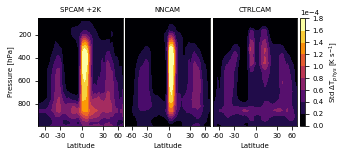

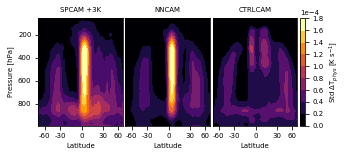

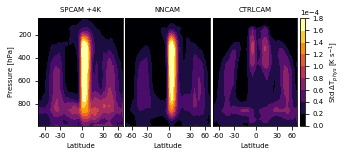

In [79]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak_D024, exps_1k_D024, exps_2k_D024, exps_3k_D024, exps_4k_D024]):
    f = mean_panels(h1stds, lambda d: d['TPHYSTND'].isel(lev=slice(5, None)).mean('lon'), exps, 
                    contourf=True, width=twocols, titles=['SPCAM ' + name, 'NNCAM', 'CTRLCAM'],
                    levels=np.arange(0, 2e-4, 2e-5), cm='inferno', unit='Std $\Delta$T$_{phys}$ [K s$^{-1}$]')
    f.savefig(f'{FIG_DIR}comp_stdTPHY_{name}.pdf')
    plt.show()

### Moistening

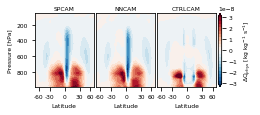

In [117]:
f = mean_panels(h0means, lambda d: d['PHQ'].isel(lev=slice(5, None)).mean('lon'), exps_ak_D024, 
                contourf=True, titles=['SPCAM', 'NNCAM', 'CTRLCAM'],
                levels=np.arange(-3e-8, 3.3e-8, 3e-9), unit='$\Delta$Q$_{phys}$ [kg kg$^{-1}$ s$^{-1}$]',
                cbar_ticks=np.arange(-3e-8, 4e-8, 1e-8))

In [118]:
savefigs(f, 'mean_moistening')

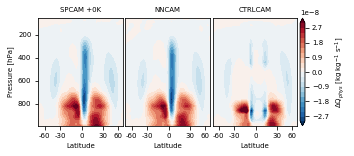

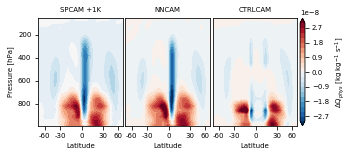

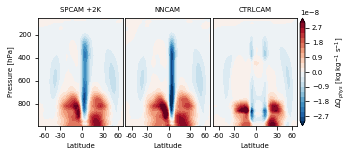

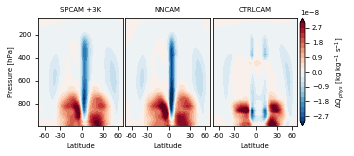

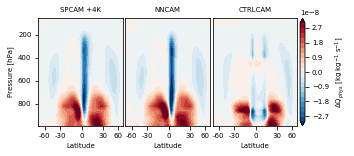

In [80]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak_D024, exps_1k_D024, exps_2k_D024, exps_3k_D024, exps_4k_D024]):
    f = mean_panels(h0means, lambda d: d['PHQ'].isel(lev=slice(5, None)).mean('lon'), exps, 
                    contourf=True, width=twocols, titles=['SPCAM ' + name, 'NNCAM', 'CTRLCAM'],
                    levels=np.arange(-3e-8, 3.3e-8, 3e-9), unit='$\Delta$Q$_{phys}$ [kg kg$^{-1}$ s$^{-1}$]')
    f.savefig(f'{FIG_DIR}comp_PHQ_{name}.pdf')
    plt.show()

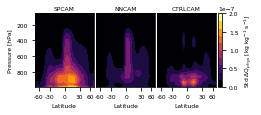

In [253]:
f = mean_panels(h1stds, lambda d: d['PHQ'].isel(lev=slice(5, None)).mean('lon'), exps_ak_D025, 
                contourf=True, titles=['SPCAM', 'NNCAM', 'CTRLCAM'],
                levels=np.arange(0, 2.2e-7, 2e-8), cm='inferno',
                unit=r'Std $\Delta$Q$_{phys}$ [kg kg$^{-1}$ s$^{-1}$]',
                cbar_ticks=np.arange(0, 3e-7, 0.5e-7))

In [254]:
savefigs(f, 'std_moistening')

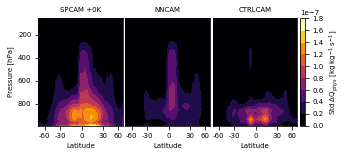

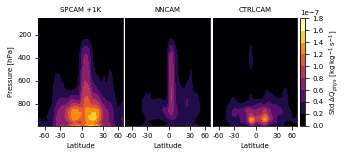

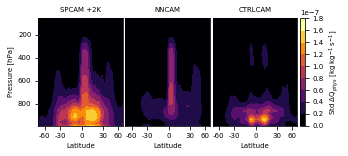

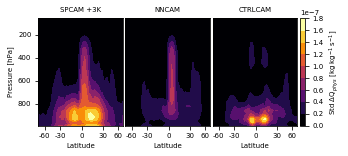

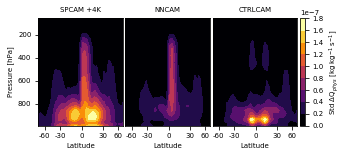

In [81]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak_D024, exps_1k_D024, exps_2k_D024, exps_3k_D024, exps_4k_D024]):
    f = mean_panels(h1stds, lambda d: d['PHQ'].isel(lev=slice(5, None)).mean('lon'), exps, 
                    contourf=True, width=twocols, titles=['SPCAM ' + name, 'NNCAM', 'CTRLCAM'],
                    levels=np.arange(0, 2e-7, 2e-8), cm='inferno',
                    unit=r'Std $\Delta$Q$_{phys}$ [kg kg$^{-1}$ s$^{-1}$]')
    f.savefig(f'{FIG_DIR}comp_stdPHQ_{name}.pdf')
    plt.show()

### Climate error

In [533]:
def climate_error(hdict, meanf, errf, ref, exps):
    means = [meanf(hdict[e]) for e in [ref] + exps]
    err = [errf(means[0], means[i]) for i in range(1, len(means))]
    stats = [vavg(means[0], da, 1) for da in err]
    stats = [gw_avg(means[0], '', da).compute() for da in stats]
    return stats

In [596]:
climerr = {v: [climate_error(h0means,
    lambda d: d.isel(lev=slice(5, None), ilev=slice(5, None)),
    lambda ref, d: np.fabs(ref[v] - d[v]), e[0], e[1:]) 
           for e in [exps_ak, exps_1k, exps_2k, exps_3k, exps_4k]] for v in ['TAP', 'QAP', 'TPHYSTND', 'PHQ']}

In [597]:
np.array(climerr['TAP']).shape

(5, 4)

In [853]:
def plot_climerr(data, var='temperature', legend=True):
    fig, ax = plt.subplots(figsize=(onecol, 2.2)); plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.2)
    data = np.array(data); data /= data[0, 2]
    x = np.arange(5)
    sns.despine()
    plt.scatter(x, data[:, 0], label='NNCAM', c=colors[1])
    plt.scatter(x, data[:, 1], label='NNCAM-ref+4K', edgecolors=colors[1], marker='^', c='white')
    plt.scatter(x, data[:, 2], label='NNCAM-4K', edgecolors=colors[1], marker='x', c=colors[1])
    plt.scatter(x, data[:, 3], label='CTRLCAM', c=colors[2], zorder=0.5)
    if legend: plt.legend();
    plt.ylabel(f'Mass weighted {var} difference [K]')
    plt.xlabel('SST increase [K]');
    return fig

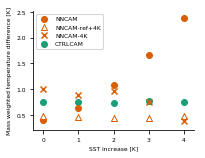

In [854]:
f = plot_climerr(climerr['TAP']); savefigs(f, 'climerr_TAP')

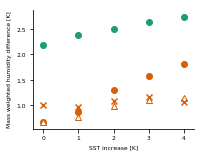

In [600]:
f = plot_climerr(climerr['QAP'], 'humidity', legend=False); savefigs(f, 'climerr_QAP')

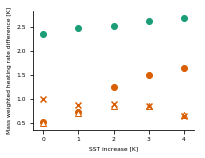

In [601]:
f = plot_climerr(climerr['TPHYSTND'], 'heating rate', False); savefigs(f, 'climerr_TPHYSTND')

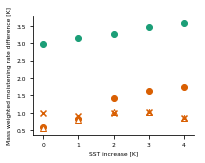

In [602]:
f = plot_climerr(climerr['PHQ'], 'moistening rate', False); savefigs(f, 'climerr_PHQ')

### Snapshots

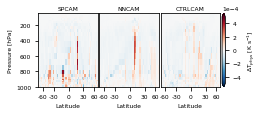

In [269]:
f = mean_panels(h1s, lambda d: d['TPHYSTND'].isel(lev=slice(5, None), lon=35, time=7), exps_ak_D025,
                contourf=False, titles=['SPCAM', 'NNCAM', 'CTRLCAM'], 
                vmin=-5e-4, vmax=5e-4, unit='$\Delta$T$_{phys}$ [K s$^{-1}$]')

In [270]:
savefigs(f, 'snapshot_heating')

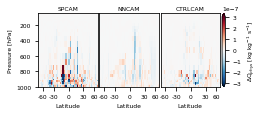

In [312]:
f = mean_panels(h1s, lambda d: d['PHQ'].isel(lev=slice(5, None), lon=35, time=7), exps_ak_D025,
                contourf=False, titles=['SPCAM', 'NNCAM', 'CTRLCAM'], 
                vmin=-3e-7, vmax=3e-7, unit='$\Delta$Q$_{phys}$ [kg kg$^{-1}$ s$^{-1}$]')

In [313]:
savefigs(f, 'snapshot_moistening')

### Line plots

In [307]:
def mean_panels_line(hdict, vars, exps, colors, width=onecol, height=3, labels=None, ylabels=None, bottom_space=0.12,
                     zorders=[2, 3, 1]):
    npanels = len(vars)
    fig, axs = plt.subplots(npanels, 1, figsize=(width, height))
    if labels is None: labels = exps
    for iax, ax in enumerate(axs.flat):
        if ylabels is not None: ax.set_ylabel(ylabels[iax])
        for ie, e in enumerate(exps):
            ax.plot(gwsum, hdict[e][vars[iax]].mean('lon'), c=colors[ie], lw=2, label=labels[ie], zorder=zorders[ie])
            
    [ax.set_xticks(gw_lats) for ax in axs.flat]; [ax.set_xticklabels(label_lats) for ax in axs.flat]; 
    [ax.set_xlim(0, 2) for ax in axs.flat]
    axs[-1].set_xlabel('Latitude')
    [ax.set_xticklabels([]) for ax in axs.flat[:-1]]
    
    if labels is not None: axs[0].legend()
    
    plt.subplots_adjust(wspace=0.03, hspace=0.15, left=0.17, right=0.98, bottom=bottom_space, top=0.98)    
    return fig

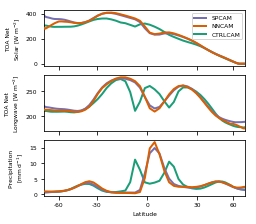

In [308]:
f = mean_panels_line(h0means, ['FSNT','FLNT', 'PRECT'], exps_ak_D025, colors, 
                     labels=['SPCAM', 'NNCAM', 'CTRLCAM'],
                     ylabels=['TOA Net \n' r'Solar [W m$^{-2}$]', 'TOA Net \n' r'Longwave [W m$^{-2}$]',
                              'Precipitation \n' r'[mm d$^{-1}$]'])

In [309]:
savefigs(f, 'TOA_precip')

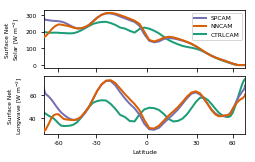

In [310]:
f = mean_panels_line(h0means, ['FSNS','FLNS'], exps_ak_D025, colors, 
                     labels=['SPCAM', 'NNCAM', 'CTRLCAM'], height=2.2, bottom_space=0.2,
                     ylabels=['Surface Net \n' r'Solar [W m$^{-2}$]', 'Surface Net \n' r'Longwave [W m$^{-2}$]'])

In [311]:
savefigs(f, 'surface_radiation')

## lat-lon figures

In [495]:
for e in exps_3kw1:
    h0means[e]['vintTPHYSTND'] = vint(h0means[e], 'TPHYSTND', C_P).compute()

In [496]:
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [843]:
def latlon_panels(hdict, func, exps, exp_ref=None, cm_ref='plasma', cm='RdBu_r', unit='Temperature [K]', 
                levels_ref=None, levels=None, clevels=None, clabel_locs=[], clabel_fmt='%.0f', 
                clev_color='white', width=onecol, height=1.5, titles=None):
    has_ref = int(exp_ref is not None)
    npanels = len(exps) + has_ref
    fig, axs = plt.subplots(2,2, figsize=(width, height), subplot_kw=dict(projection=ccrs.Robinson()))
    
    if has_ref:
        da_ref = func(hdict[exp_ref])
        da_ref = xr.DataArray(
            np.concatenate([da_ref.values, da_ref.values[:, -1][:, None]], 1), 
            dims={'lat': da_ref.lat, 'lon': list(da_ref.lon) + [360.]}, 
            coords={'lat': da_ref.lat, 'lon': list(da_ref.lon) + [360.]})
        da_ref.plot.contourf(ax=axs[0], add_colorbar=False, cmap=cm_ref, levels=levels_ref,
                             transform=ccrs.PlateCarree())

    for ax, exp in zip(axs.flat[has_ref:], exps):
        da = func(hdict[exp]).copy() 
        da = xr.DataArray(
            np.concatenate([da.values, da.values[:, -1][:, None]], 1), 
            dims={'lat': da.lat, 'lon': list(da.lon) + [360.]}, 
            coords={'lat': da.lat, 'lon': list(da.lon) + [360.]})
        if has_ref: 
            da -= da_ref
        im = da.plot.contourf(ax=ax, add_colorbar=False, cmap=cm, levels=levels, transform=ccrs.PlateCarree())
            
#     [ax.set_xticks(gw_lats) for ax in axs.flat]; [ax.set_xticklabels(label_lats) for ax in axs.flat]; 
#     [ax.set_yticks([]) for ax in axs.flat[1:]]; [ax.set_ylabel('') for ax in axs.flat[1:]];
#     axs[0].set_ylabel('Pressure [hPa]'); [ax.set_xlabel('Latitude') for ax in axs.flat]
    if titles is not None: [ax.set_title(titles[i], pad=0) for i, ax in enumerate(axs.flat)]
    
    plt.subplots_adjust(wspace=0.03, hspace=0.3, left=0.1, right=0.9, bottom=0.0)
    cb = fig.colorbar(im, ax=axs.flat, pad=0.01, extend='both', use_gridspec=False, orientation='vertical'); 
    cb.set_label(unit)
    cb.formatter.set_powerlimits((1, 10)); cb.update_ticks()
    cb.ax.yaxis.set_offset_position('left')
    
    return fig, axs

### 3KW1

In [839]:
pert = h0means[exps_3kw1_D024[0]]['TS'] - h0means[exps_ak[0]]['TS']

In [840]:
tmp = xr.DataArray(np.concatenate([pert.values, pert.values[:, -1][:, None]], 1), 
                   dims={'lat': pert.lat, 'lon': list(pert.lon) + [360.]}, 
                   coords={'lat': pert.lat, 'lon': list(pert.lon) + [360.]})

In [841]:
onecol

3.451020408163265

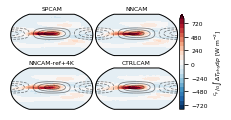

In [850]:
fig, axs = latlon_panels(h0means, lambda d: d['vintTPHYSTND'], exps_3kw1, 
                         unit=r'$^{C_p}/_G \int \Delta T_{\mathrm{phy}} \mathrm{d}p$ [W m$^{-2}$]', levels=np.arange(-800, 880, 80));
[tmp.plot.contour(ax=ax, colors='k', linestyles='-', levels=[0.5, 1.5, 2.5], transform=ccrs.PlateCarree(),
                   linewidths=0.75, alpha=0.5) for ax in axs.flat]
[tmp.plot.contour(ax=ax, colors='k', linestyles='--', levels=[-2.5, -1.5, -0.5], transform=ccrs.PlateCarree(),
                   linewidths=0.75, alpha=0.5) for ax in axs.flat];
titles=['SPCAM', 'NNCAM', 'NNCAM-ref+4K', 'CTRLCAM']
[ax.set_title(titles[i], pad=4) for i, ax in enumerate(axs.flat)];

In [851]:
savefigs(fig, '3kw1_tphys')

### Radiation differences

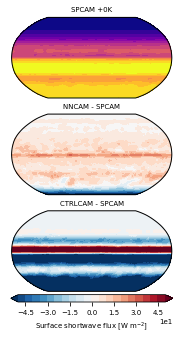

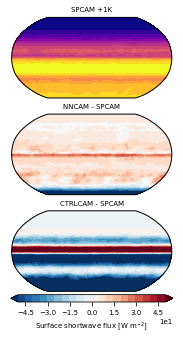

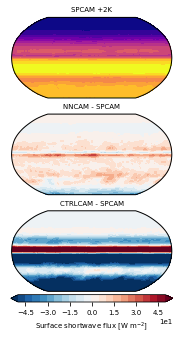

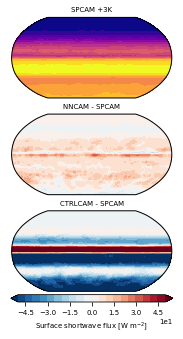

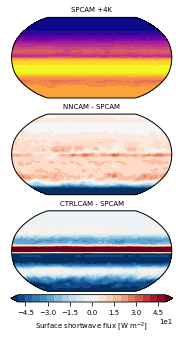

In [188]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak_D024, exps_1k_D024, exps_2k_D024, exps_3k_D024, exps_4k_D024]):
    fig, axs = latlon_panels(h0means, lambda d: d['FSNS'], exps[1:], exps[0], 
                             titles=['SPCAM ' + name, 'NNCAM - SPCAM', 'CTRLCAM - SPCAM'],
                             levels_ref=np.arange(0, 300, 20),
                             levels=np.arange(-50, 55, 5),
                             unit=r'Surface shortwave flux [W m$^{-2}$]');
    fig.savefig(f'{FIG_DIR}globe_FSNS_{name}.pdf')
    plt.show()

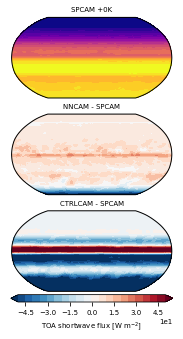

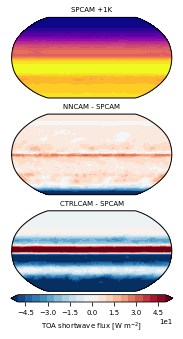

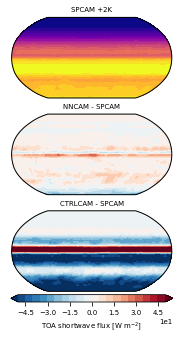

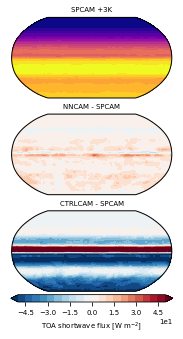

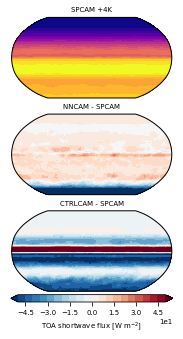

In [194]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak_D024, exps_1k_D024, exps_2k_D024, exps_3k_D024, exps_4k_D024]):
    fig, axs = latlon_panels(h0means, lambda d: d['FSNT'], exps[1:], exps[0], 
                             titles=['SPCAM ' + name, 'NNCAM - SPCAM', 'CTRLCAM - SPCAM'],
                             levels_ref=np.arange(0, 400, 20),
                             levels=np.arange(-50, 55, 5),
                             unit=r'TOA shortwave flux [W m$^{-2}$]');
    fig.savefig(f'{FIG_DIR}globe_FSNT_{name}.pdf')
    plt.show()

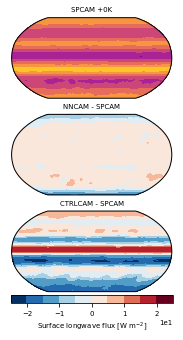

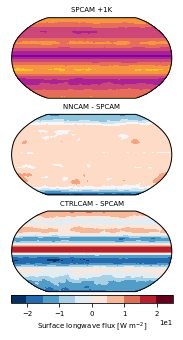

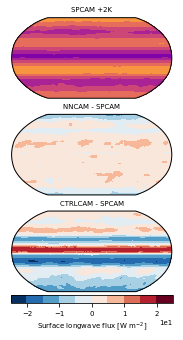

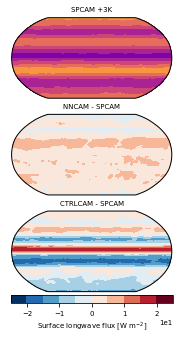

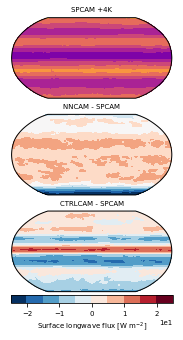

In [193]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak_D024, exps_1k_D024, exps_2k_D024, exps_3k_D024, exps_4k_D024]):
    fig, axs = latlon_panels(h0means, lambda d: d['FLNS'], exps[1:], exps[0], 
                             titles=['SPCAM ' + name, 'NNCAM - SPCAM', 'CTRLCAM - SPCAM'],
                             levels_ref=np.arange(0, 100, 10),
                             levels=np.arange(-25, 30, 5),
                             unit=r'Surface longwave flux [W m$^{-2}$]');
    fig.savefig(f'{FIG_DIR}globe_FLNS_{name}.pdf')
    plt.show()

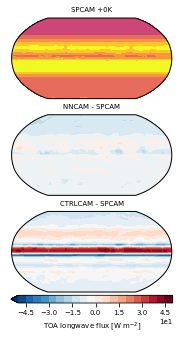

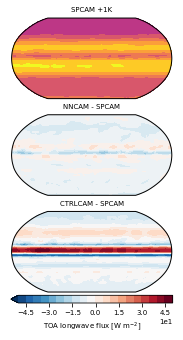

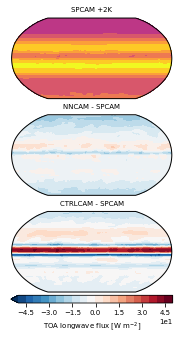

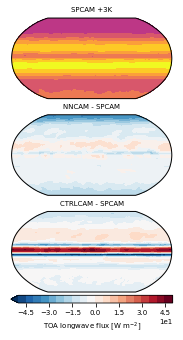

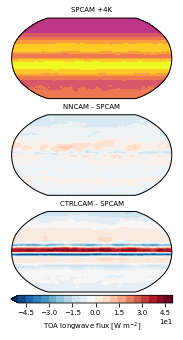

In [192]:
for name, exps in zip(['+0K', '+1K', '+2K', '+3K', '+4K'], 
                      [exps_ak_D024, exps_1k_D024, exps_2k_D024, exps_3k_D024, exps_4k_D024]):
    fig, axs = latlon_panels(h0means, lambda d: d['FLNT'], exps[1:], exps[0], 
                             titles=['SPCAM ' + name, 'NNCAM - SPCAM', 'CTRLCAM - SPCAM'],
                             levels_ref=np.arange(100, 300, 20),
                             levels=np.arange(-50, 55, 5),
                             unit=r'TOA longwave flux [W m$^{-2}$]');
    fig.savefig(f'{FIG_DIR}globe_FLNT_{name}.pdf')
    plt.show()

## Variability

### Std plots

In [86]:
minlev = 3

In [87]:
levs = h1s[exps_ak[0]].lev[minlev:].values

In [156]:
def std_panel(hdict, func, exps, xlabel, xlims):
    fig, ax = plt.subplots(figsize=(onecol, 2.2))
    plt.subplots_adjust(left=0.3, right=0.95, bottom=0.2, top=0.95)
    [plt.plot(func(hdict[exps[i]]), levs, label=e, c=colors[i], lw=2) 
     for i, e in enumerate(['SPCAM', 'NNCAM', 'CTRLCAM'])]
    ax.legend()
    sns.despine()
    ax.set_xlabel(xlabel); ax.set_ylabel(r'Pressure [hPa]')
    ax.ticklabel_format(axis='x', scilimits=(0, 0))
    ax.set_ylim(0, 1000); ax.set_xlim(xlims)
    ax.invert_yaxis()
    return fig

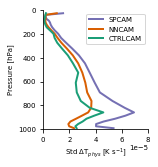

In [157]:
f = std_panel(h1stds, lambda d: d['TPHYSTND'].isel(lev=slice(minlev, None)).mean(('lat', 'lon')), exps_ak_D024,
              r'Std $\Delta$T$_{phys}$ [K s$^{-1}$]', (0, 0.8e-4))

In [158]:
f.savefig(f'{FIG_DIR}std_tphys.pdf')

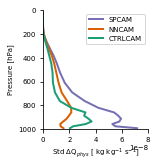

In [159]:
f = std_panel(h1stds, lambda d: d['PHQ'].isel(lev=slice(minlev, None)).mean(('lat', 'lon')), exps_ak_D024,
              r'Std $\Delta$Q$_{phys}$ [ kg kg$^{-1}$ s$^{-1}$]', (0, 0.8e-7))

In [160]:
f.savefig(f'{FIG_DIR}std_phq.pdf')

### Precip hist

In [346]:
prects = {e: h1s[e]['PRECT'].plot(range=(0, 4.5e-6), bins=100, label=e) 
          for e in exps_ak +exps_4k};
plt.close('all')

In [365]:
#save_tmp('prects', prects)
prects = load_tmp('prects')

In [650]:
labels = ['SPCAM', 'NNCAM', 'CTRLCAM', 'SPCAM+4K', 'NNCAM-ref+4K', 'CTRLCAM+4K']
zorders = [2, 3, 1, 1.5, 2.5, 0.5]

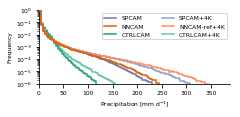

In [651]:
fig, ax = plt.subplots(figsize=(onecol, 1.5))
plt.subplots_adjust(wspace=0.03, left=0.13, right=0.9, bottom=0.22, top=0.9)
[ax.step(prects[e][1][:-1]*1e3*24*3600, prects[e][0]/prects[e][0].sum(), label=labels[i], c=(colors + colors2)[i], 
         where='post', zorder=zorders[i]) for i, e in enumerate(exps_ak_D025 + exps_4k_D024)]
ax.set_yscale('log')
ax.legend(ncol=2)
sns.despine()
ax.set_xlabel(r'Precipitation [mm d$^{-1}$]'); ax.set_ylabel(r'Frequency')
#ax.set_title('Precipitation distribution')
#ax.ticklabel_format(axis='x', scilimits=(0, 0))
ax.set_ylim(1e-6, 1); 
ax.set_xlim(0, prects[exps[0]][1][-1]*1e3*24*3600);

In [652]:
savefigs(fig, 'prec_hist')

## Energy conservation

### Scatter plots

In [419]:
d = h1s[exps_ak_D025[1]]

In [421]:
NNQatm = vint(d, 'NNDQ', 1)
NNQsurf = d['NNLHF'] / L_V - d['NNPRECT'] * 1e3
NNSE = vint(d, 'NNDT', C_P) - d['NNSHF'] - d['NNFSNT'] + d['NNFSNS'] + d['NNFLNT'] - d['NNFLNS']
NNME = d['NNLHF'] - vint(d, 'NNDQ', L_V)

In [422]:
dsp = h1s[exps_ak_D025[0]]

In [423]:
SPSE = vint(d, 'TPHYSTND', C_P) - d['SHFLX'] - d['FSNT'] + d['FSNS'] + d['FLNT'] - d['FLNS']
SPME = d['LHFLX'] - vint(d, 'PHQ', L_V)

In [466]:
xs = [d.isel(time=slice(0, 10)).values.flat for d in [SPSE, NNSE]]
ys = [d.isel(time=slice(0, 10)).values.flat for d in [SPME, NNME]]

In [467]:
diffs = [np.array(x)-np.array(y) for x, y, in zip(xs, ys)]

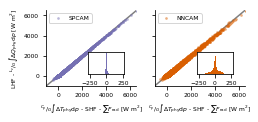

In [662]:
fig, axs = plt.subplots(1, 2, figsize=(onecol, 1.5))
plt.subplots_adjust(wspace=0.2, left=0.15, right=0.95, bottom=0.25, top=0.95)
[axs[i].scatter(xs[i], ys[i], alpha=0.5, s=7, color=colors[i], linewidths=0, label=l) 
 for i, l in enumerate(['SPCAM', 'NNCAM'])]
sns.despine()
for ax in axs:
    ax.legend()
    ax.set_xlabel(r'$^{C_p}/_G \int \Delta T_{\mathrm{phy}} \mathrm{d}p$ - SHF - $\sum F_{\mathrm{rad}}$ [W m$^{2}$]');
    ax.set_ylim(-1e3, 6.5e3); ax.set_xlim(-1e3, 6.5e3)
    ax.plot([-1e3, 6.5e3], [-1e3, 6.5e3], zorder=0.1, c='gray');
axs[1].set_yticklabels([])
axs[0].set_ylabel(r'LHF - $^{L_v}/_G \int \Delta Q_{\mathrm{phy}} \mathrm{d}p$ [W m$^{2}$]')
iaxs = [inset_axes(ax, width=0.5, height=0.3, loc=4, borderpad=2) for ax in axs]
hists = [iax.hist(diffs[i], bins=100, range=(-250, 250), color=colors[i]) for i, iax in enumerate(iaxs)];
[iax.set_yticks([]) for iax in iaxs];

In [663]:
savefigs(fig, 'engy_scatter')

##### Moisture

In [151]:
a = NNQsurf.isel(time=slice(0, None, 50)).values.flat
b = NNQatm.isel(time=slice(0, None, 50)).values.flat

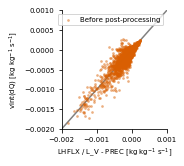

In [152]:
fig, ax = plt.subplots(figsize=(onecol, 2.2))
plt.subplots_adjust(left=0.3, right=0.95, bottom=0.2, top=0.95)
ax.scatter(a, b, alpha=0.5, s=7, color=colors[1], linewidths=0, 
           label='Before post-processing')
sns.despine()
ax.legend()
ax.set_xlabel(r'LHFLX / L_V - PREC [kg kg$^{-1}$ s$^{-1}$]'); ax.set_ylabel(r'vint(dQ) [kg kg$^{-1}$ s$^{-1}$]')
#ax.set_title('Heating rate variability')
#ax.ticklabel_format(axis='x', scilimits=(0, 0))
ax.set_ylim(-2e-3, 1e-3); ax.set_xlim(-2e-3, 1e-3)
ax.plot([-2e-3, 1e-3], [-2e-3, 1e-3], zorder=0.1, c='gray');

In [153]:
fig.savefig(f'{FIG_DIR}moisture_scatter.pdf')

### TE/TW timeseries

In [706]:
TEs = {e: gw_avg(d, 'TE').compute() for e, d in h0s.items()}
TWs = {e: gw_avg(d, 'TW').compute() for e, d in h0s.items()}

In [142]:
save_tmp('TEs', TEs); save_tmp('TWs', TWs)
TEs, TWs = load_tmp('TEs'), load_tmp('TWs')

In [773]:
def plot_ts(TE, TW, func, exps, labels, colors, ylabel):
    fig, ax = plt.subplots(1, 1, figsize=(onecol, 1.5))
    ax2 = ax.twinx()
    axs=[ax, ax2]
    plt.subplots_adjust(wspace=0.2, left=0.15, right=0.85, bottom=0.25, top=0.92)
    t = np.arange(len(func(TE[exps[0]]).time.values))
    t = t / 12
    for ax, T, title, ls in zip(axs, [TE, TW], [r'Global energy [J m$^{2}$]', r'Global moisture [kg m$^{2}$]'], ['-', '--']):
        [ax.plot(t, func(T[e]), label=labels[i], c=colors[i], ls=ls) for i, e in enumerate(exps)]
        ax.set_xlabel('Time [y]'); ax.set_ylabel(title)
        ax.set_xlim((0, 5)); ax.set_xticks(np.arange(6))
    axs[1].legend(ncol=1, framealpha=1, facecolor='white', loc=3)
    axs[0].set_ylim(3.275e9, 3.32e9)
    axs[1].set_ylim(24, 30)
    return fig

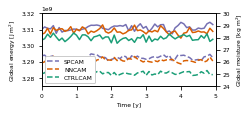

In [774]:
f = plot_ts(TEs, TWs, lambda d: d, exps_ak_D025, labels,
        colors, 'Globally integrated energy')

In [775]:
savefigs(f, 'global_engy')

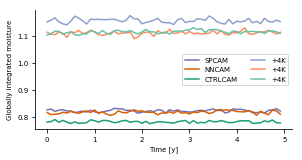

In [146]:
f = plot_ts(TWs, lambda d: d, exps_ak_D024 + exps_4k_D024, labels,
        colors + colors2, ylabel='Globally integrated moisture')

In [147]:
f.savefig(f'{FIG_DIR}TW_timeseries.pdf')

In [672]:
def plot_polar(TE, TW, func, exps, colors):
    fig, axs = plt.subplots(1, 2, figsize=(onecol, 1.5), subplot_kw={'projection': 'polar'})
    plt.subplots_adjust(wspace=0.2, left=0.13, right=1.0, bottom=0.22, top=0.9)
    t = np.arange(len(func(TE[exps[0]]).time.values))
    t = t / 12
    for ax, T, title in zip(axs, [TE, TW], ['Global energy', 'Global water']):
        [ax.plot(t, func(T[e]), label=labels[i], c=colors[i]) for i, e in enumerate(exps)]
    axs[0].set_ylim(1.05e8, 1.08e8)
    return fig

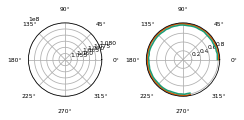

In [673]:
f = plot_polar(TEs, TWs, lambda d: d, exps_ak_D025, colors)

## W-K diagram

In [314]:
WK_DATA = '/beegfs/DATA/pritchard/srasp/wkdata/'
!ls {WK_DATA}

SpaceTime.PRECT.nnatmonly_fbp8_D024_3kw1_allfix_betafix35.nc
SpaceTime.PRECT.nnatmonly_fbp8_D024_3kw1_nofix_betafix35.nc
SpaceTime.PRECT.nnatmonly_fbp8_D024_4k_allfix_betafix35.nc
SpaceTime.PRECT.nnatmonly_fbp8_D024_4k_nofix_betafix35.nc
SpaceTime.PRECT.nnatmonly_fbp8_D024_andkua_allfix_betafix35.nc
SpaceTime.PRECT.nnatmonly_fbp8_D024_andkua_nofix_betafix35.nc
SpaceTime.PRECT.nnatmonly_fbp8_D025_andkua_nofix_betafix35.nc
SpaceTime.PRECT.nonsp_3kw1.nc
SpaceTime.PRECT.nonsp_4k.nc
SpaceTime.PRECT.nonsp_andkua.nc
SpaceTime.PRECT.sp8fbp_3kw1.nc
SpaceTime.PRECT.sp8fbp_4k.nc
SpaceTime.PRECT.sp8fbp_andkua.nc


In [347]:
wks = [xr.open_dataset(f'{WK_DATA}SpaceTime.PRECT.{e}.nc') for e in exps_ak_D025 + exps_4k_D024]

In [348]:
wks = [wk.isel(freq=slice(1, None)) for wk in wks]

In [349]:
freq_days = 1/wks[0].freq

In [350]:
labels_days = [30, 6, 3, 2]
labels_freq = 1/np.array(labels_days)

In [351]:
hs = [12, 25, 50]
g = 9.81

In [352]:
def ER(k, h):
    n = 1; lat = 0.
    Beta = 2. * 7.292E-5 * np.cos(abs(lat)) / 6.37E6
    t4 = (Beta / np.ma.sqrt(g * h)) * (2 * n + 1.)
    return -Beta * k / (k * k + t4)

In [353]:
lat = 0.
ll = 2. * np.pi * 6.37E6 * np.cos(abs(lat))

In [354]:
k = 2 * np.pi * wks[0].wave / ll

In [355]:
def tofreq(x): return 1/(2 * np.pi / (x * 24 * 60 * 60))

In [356]:
def wk_panel(ax, data, title, add_text=True, **kwargs):
    im = ax.contourf(data.wave, data.freq, data['FIG_3_SYM'], **kwargs)
    ax.set_yticks(labels_freq); ax.set_yticklabels(labels_days);
    [ax.axhline(y, linestyle='--', c='gray', zorder=1.1, linewidth=0.75, alpha=0.5) for y in labels_freq]
    [ax.plot(data.wave, tofreq(k*np.sqrt(g * h)), c='gray', lw=0.7, alpha=0.5) for h in hs];
    [ax.plot(data.wave, tofreq(ER(k, h)), c='gray', lw=0.7, alpha=0.5) for h in hs];
    ax.set_xlim(data.wave[0], data.wave[-1]); ax.set_ylim(data.freq[0], data.freq[-1]);
    if add_text:
        ax.text(5, 1/2.4, 'Kelvin', color='white', weight='bold', fontsize=5, zorder=2);
        ax.text(-14, 1/15, 'n=1 ER', color='white', weight='bold', fontsize=5, zorder=2);
        ax.text(4, 1/28, 'MJO', color='white', weight='bold', fontsize=5, zorder=2);
    ax.set_xlabel(r'Zonal $k$'); ax.set_ylabel('Period [days]')
    ax.set_title(title)
    ax.set_xticks([-12, -6, 0, 6, 12])
    return im

In [642]:
titles = ['SPCAM', 'NNCAM', 'CTRLCAM']

In [644]:
def wk_panels(data):
    fig, axs = plt.subplots(1, 3, figsize=(onecol, 1.5))
    for i, (ax, wk) in enumerate(zip(axs.flat, data)):
        im = wk_panel(ax, wk, titles[i], True if i == 0 else False, cmap='inferno', 
                      levels=np.arange(1.5, 3.25, 0.25), extend='both')
        if i > 0: ax.set_ylabel(''); ax.set_yticks([])
    plt.subplots_adjust(wspace=0.03, left=0.13, right=1.0, bottom=0.22, top=0.9)
    cb = fig.colorbar(im, ax=axs, pad=0.01); #cb.set_label('Log power spectrum')
    cb.set_ticks(np.arange(0, 4, 0.5))
    return fig

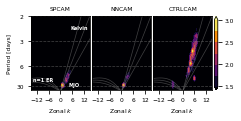

In [645]:
f = wk_panels(wks[:3])

In [646]:
savefigs(f, 'wk_ref')

In [647]:
titles = ['SPCAM+4K', 'NNCAM-ref+4K', 'CTRLCAM+4K']

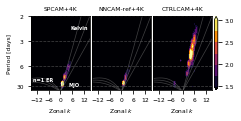

In [648]:
f = wk_panels(wks[3:])

In [649]:
savefigs(f, 'wk_4k')